# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df = pd.merge(study_results,mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
number_mice = len(study_df['Mouse ID'].unique())
number_mice

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

double_df = study_df.duplicated(subset=(['Mouse ID','Timepoint']),keep=False)
doubled_mice_id = study_df.loc[double_df,'Mouse ID'].unique()
doubled_mice_id


array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info2 =[]
for i in doubled_mice_id:
 info = study_df.loc[study_df['Mouse ID']== i,:]
 duplicate_mouse_info2.append(info)

duplicate_mouse_info2 = pd.concat(duplicate_mouse_info2)
duplicate_mouse_info2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

idx_duplicate_mouse = duplicate_mouse_info2.index.tolist()
clean_study_df = study_df.drop(index = idx_duplicate_mouse, axis=0).reset_index(drop=True)
clean_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = len(clean_study_df['Mouse ID'].unique())
number_mice_clean

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_info = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
tumor_mean = tumor_info.mean()
tumor_median = tumor_info.median()
tumor_variance = tumor_info.var()
tumor_std = tumor_info.std()
tumor_sem = tumor_info.sem()

drug_tumor_df = pd.DataFrame({'Mean Tumor Volume' : tumor_mean, 'Median Tumor Volume':tumor_median,
                              'Variance Tumor Volume':tumor_variance,'Std. Dev. Tumor Volume':tumor_std,'Std. Err. Tumor Volume':tumor_sem})
drug_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,Std. Err. Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumor_info_df = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var','std', 'sem','count'])
tumor_info_df


,mean,median,var,std,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar and Pie Charts

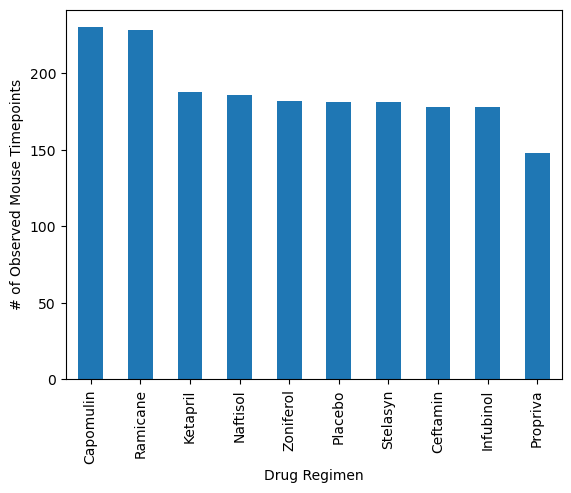

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
clean_study_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False).plot(kind='bar', ylabel='# of Observed Mouse Timepoints')
plt.show()

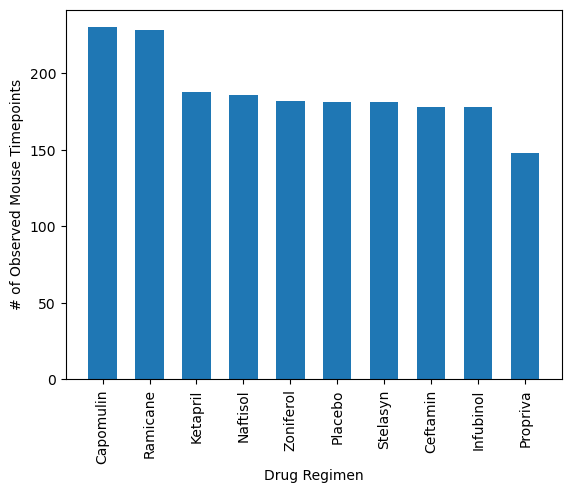

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
num_observations = clean_study_df.groupby('Drug Regimen')['Timepoint'].count()
num_observations_sorted = num_observations.sort_values(ascending=False)
Idx_drug_sorted = num_observations_sorted.index.tolist()

# Bar plot
plt.bar(Idx_drug_sorted,num_observations_sorted, width=0.6)
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

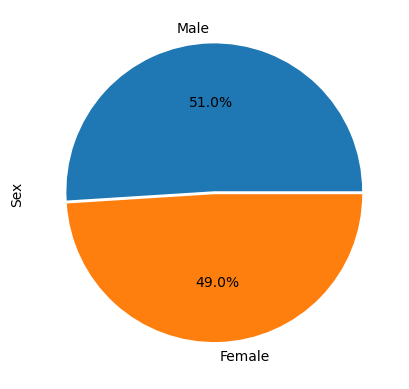

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_count = clean_study_df.groupby('Sex')['Mouse ID'].count()
perc_female = round((mice_sex_count['Female']/(mice_sex_count['Female']+mice_sex_count['Male']))*100,1)
perc_male = round((mice_sex_count['Male']/(mice_sex_count['Female']+mice_sex_count['Male']))*100,1)
percentage_sex = [perc_female,perc_male]
mice_sex_study = pd.DataFrame({'Counting': mice_sex_count, 'Percent':percentage_sex})
mice_sex_study = mice_sex_study.sort_index(ascending=False)

# Pie chart
mice_sex_study.plot(kind='pie',y='Percent', autopct='%1.1f%%',explode=[0.02,0],legend=False, ylabel='Sex')
plt.show()


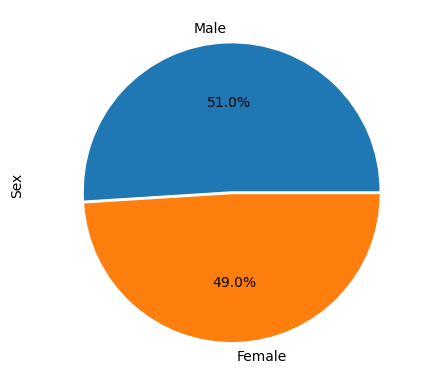

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_count = clean_study_df.groupby('Sex')['Mouse ID'].count()
perc_female = round((mice_sex_count['Female']/(mice_sex_count['Female']+mice_sex_count['Male']))*100,1)
perc_male = round((mice_sex_count['Male']/(mice_sex_count['Female']+mice_sex_count['Male']))*100,1)

# Pie chart
plt.pie([perc_male, perc_female], explode=[0.02,0], colors=['C0', 'C1'],labels=['Male','Female'], autopct='%1.1f%%')
plt.annotate('Sex', xy=(0.1, 0.5), xytext=(-1.5, 0), rotation = 90)
plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
Last_timepoint_df = []
end_timepoint_study = []

# for i in clean_study_df['Mouse ID'].unique():
#     last_timepoint = clean_study_df.loc[(clean_study_df['Mouse ID'] == i), 'Timepoint'].max()
#     end_timepoint = clean_study_df.loc[(clean_study_df['Mouse ID'] == i) & (clean_study_df['Timepoint'] == last_timepoint), :]
#     end_timepoint_study.append(end_timepoint) 

last_timepoints = clean_study_df.groupby('Mouse ID')['Timepoint'].max()

for i in clean_study_df['Mouse ID'].unique():
    last_timepoint =  last_timepoints[i]
    end_timepoint = clean_study_df.loc[(clean_study_df['Mouse ID'] == i) & (clean_study_df['Timepoint'] == last_timepoint), :]
    end_timepoint_study.append(end_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint  
study_result_end = pd.concat(end_timepoint_study).reset_index(drop=True)

study_result_end



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
drug_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
outliers_tumor_data= []

for k in drug_interest:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data_last_point = study_result_end.loc[study_result_end['Drug Regimen']== k,'Tumor Volume (mm3)']
    median = tumor_data_last_point.median()
    quantile_25 = tumor_data_last_point.quantile(0.25)
    quantile_50 = tumor_data_last_point.quantile(0.5)
    quantile_75 = tumor_data_last_point.quantile(0.75)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = quantile_75 - quantile_25
    low_threshold = quantile_25 - (1.5 * iqr)
    high_threshold = quantile_75 + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = tumor_data_last_point[(tumor_data_last_point<low_threshold )|(tumor_data_last_point>high_threshold)].index
    if not outliers.empty:
        outliers_tumor_data.append(outliers)
    if k=='Capomulin':
        print(f"Capomulin's potential outliers:{study_result_end.loc[outliers,'Tumor Volume (mm3)']}")
    if k=='Ramicane':
        print(f"Ramicane's potential outliers:{study_result_end.loc[outliers,'Tumor Volume (mm3)']}")
    if k=='Infubinol':
        print(f"Infubinol's potential outliers:{study_result_end.loc[outliers,'Tumor Volume (mm3)']}")
    if k=='Ceftamin':
        print(f"Ceftamin's potential outliers:{study_result_end.loc[outliers,'Tumor Volume (mm3)']}")

    tumor_data.append(tumor_data_last_point.values)


end_study_df =pd.DataFrame(list(zip(*tumor_data)), columns=drug_interest)




Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


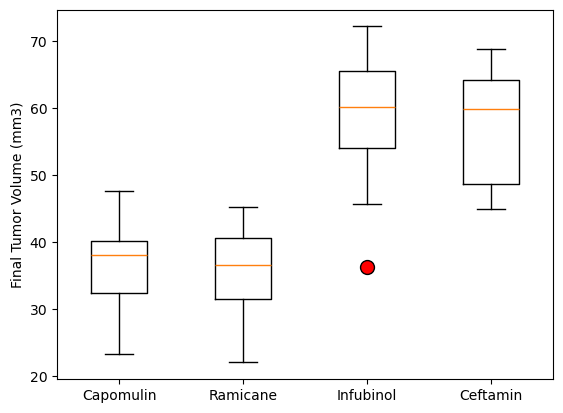

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(end_study_df,flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red', 'markeredgecolor': 'black'})
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

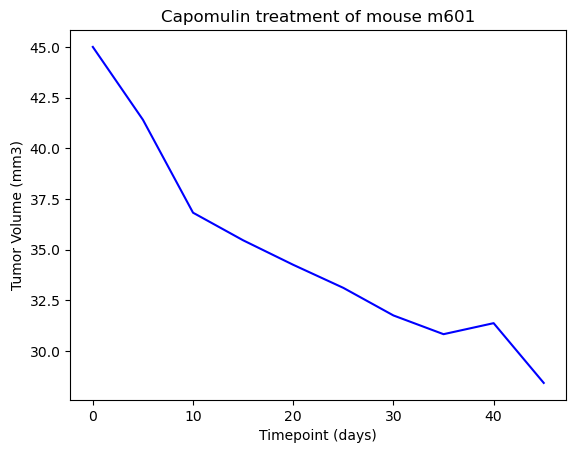

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mice_capomulin = clean_study_df.loc[clean_study_df['Drug Regimen']=='Capomulin']
mice_capomulin_id =mice_capomulin['Mouse ID'].unique()
mice_id = mice_capomulin_id[-1] # choose the mouse ID by index
mouse_timepoint = clean_study_df.loc[clean_study_df['Mouse ID']== mice_id,'Timepoint']
mouse_tumor_volume = clean_study_df.loc[clean_study_df['Mouse ID']== mice_id,'Tumor Volume (mm3)']

plt.plot(mouse_timepoint, mouse_tumor_volume, '-', color = 'Blue')
plt.title(f'Capomulin treatment of mouse {mice_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

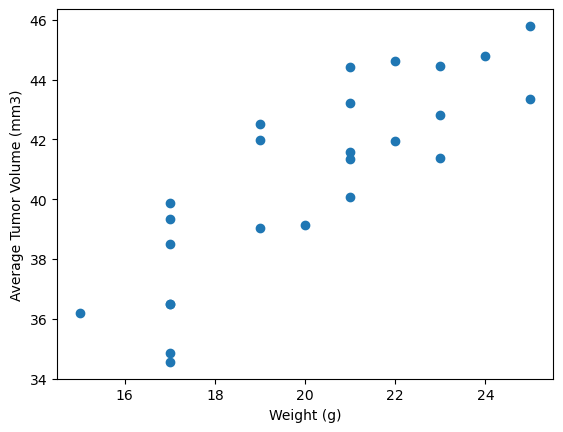

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mice_capomulin_weight = []
mice_capomulin_tumor_volume = []

for mice in mice_capomulin_id:
    mouse_weight = clean_study_df.loc[clean_study_df['Mouse ID']== mice,'Weight (g)'].values[-1]
    mouse_tumor_volume = clean_study_df.loc[clean_study_df['Mouse ID']== mice,'Tumor Volume (mm3)'].mean()
    mice_capomulin_weight.append(mouse_weight)
    mice_capomulin_tumor_volume.append(mouse_tumor_volume)


plt.scatter(mice_capomulin_weight, mice_capomulin_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


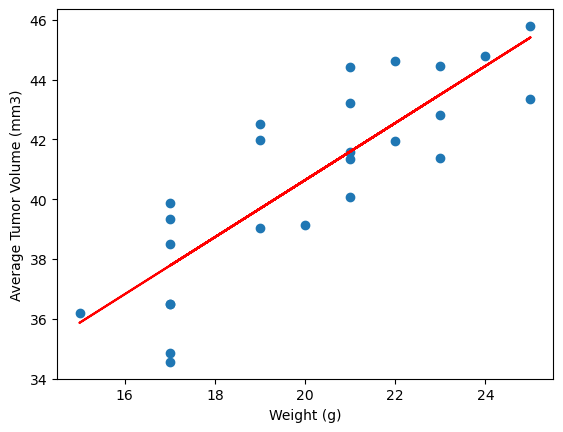

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(mice_capomulin_weight, mice_capomulin_tumor_volume)
pe_fit = pe_slope * np.array(mice_capomulin_weight) + pe_int
print(f'The correlation between mouse weight and the average tumor volume is {round(pe_r,2)}')

plt.scatter(mice_capomulin_weight,mice_capomulin_tumor_volume)
plt.plot(mice_capomulin_weight,pe_fit,'-',color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()




